# Pymaceuticals Inc.
---

    Correlation between Weight and Tumor Volume:
    There is a very strong positive correlation (0.84) between mouse weight and the average tumor volume in the Capomulin regimen.

    Effectiveness of Capomulin:
    The box plot indicates that the Capomulin and Ramicane regimens were more effective in reducing tumor size compared to Infubinol and Ceftamin.

    Outliers:
    As an outlier, the Infubinol regimen showed indicating variability in the treatment's effectiveness with certain mice.


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from scipy.stats import sem

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
mouseMetaDataDF = mouse_metadata
studyResultsDF = study_results

mergedDataResultsDF = pd.merge(studyResultsDF, mouseMetaDataDF,  on='Mouse ID', how='left')

# Display the data table for preview
mergedDataResultsDF.head(5)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice (using unique)
len(mergedDataResultsDF["Mouse ID"].unique())

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint--Identify duplicate rows based on Mouse ID and Timepoint
duplicates = mergedDataResultsDF[mergedDataResultsDF.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice = duplicates["Mouse ID"].unique()

# Display the duplicate mice
duplicate_mice

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseData = mergedDataResultsDF[mergedDataResultsDF["Mouse ID"] == "g989"]
duplicateMouseData.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanedDataResultsDF = mergedDataResultsDF[mergedDataResultsDF["Mouse ID"] != "g989"]
cleanedDataResultsDF.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(cleanedDataResultsDF["Mouse ID"].unique()))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# Use groupby 
grouped_data = cleanedDataResultsDF.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume = grouped_data["Tumor Volume (mm3)"].mean()
median_tumor_volume = grouped_data["Tumor Volume (mm3)"].median()
tumor_volume_variance = grouped_data["Tumor Volume (mm3)"].var()
tumor_volume_std_dev = grouped_data["Tumor Volume (mm3)"].std()
tumor_volume_sem = grouped_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.

summary_statistics_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": tumor_volume_variance,
    "Tumor Volume Std. Dev.": tumor_volume_std_dev,
    "Tumor Volume SEM": tumor_volume_sem
})

# Display the summary DataFrame
summary_statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

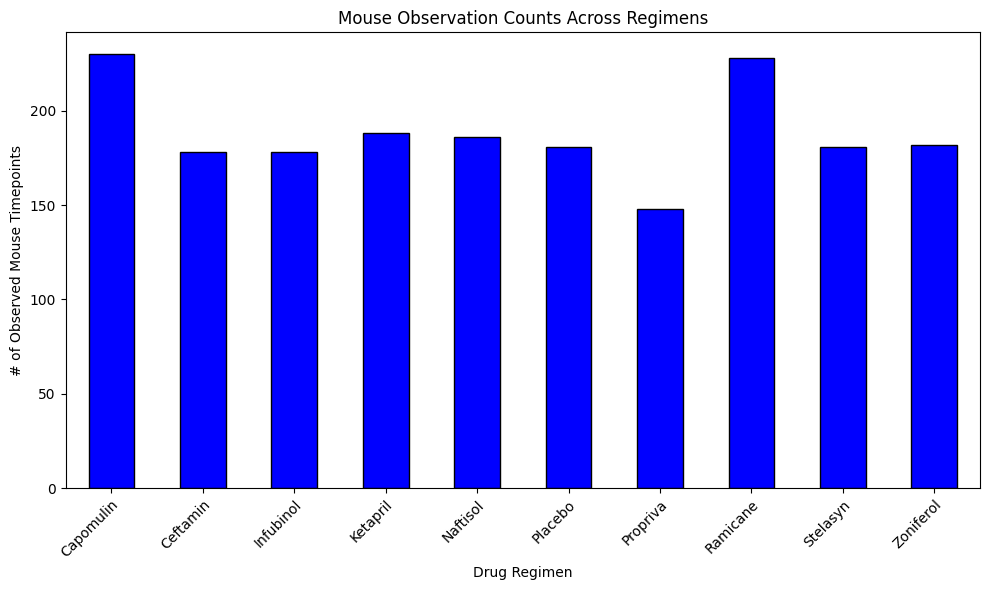

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Configure plot, figsize, title, and axis labels
drugDF = cleanedDataResultsDF.groupby("Drug Regimen")["Mouse ID"].count()
drugFig = drugDF.plot(kind="bar", figsize=(10,6), facecolor="blue", edgecolor="black", title="Mouse Observation Counts Across Regimens",
                         ylabel="# of Observed Mouse Timepoints", xlabel="Drug Regimen")
    
# Configure x-tick rotation
drugFig.set_xticklabels(drugDF.index, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

# Show plot
plt.tight_layout()
plt.show()

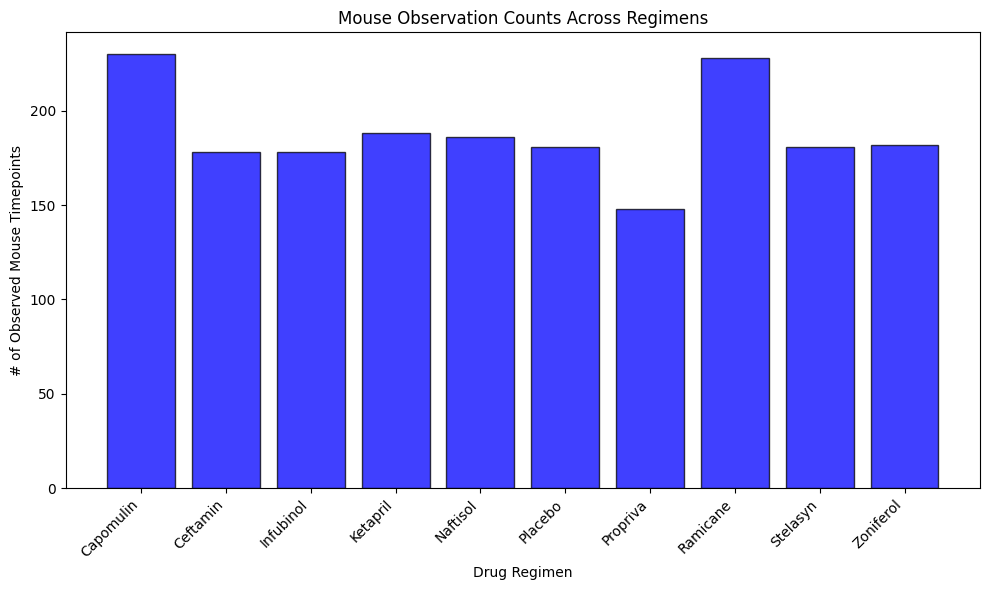

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Assign the x_labels and y_values based on the drugDF
x_labels = drugDF.index  # Drug regimens
y_values = drugDF.values  # Counts

plt.figure(figsize=(10, 6))
plt.bar(x_labels, y_values, color="blue", alpha=0.75, edgecolor="black")

plt.title("Mouse Observation Counts Across Regimens")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

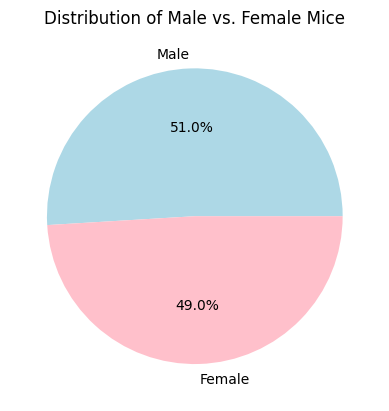

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Set genderCounts
genderCounts = cleanedDataResultsDF["Sex"].value_counts()
# Plot the pie chart
genderCounts.plot(
    kind="pie",
    autopct="%1.1f%%",
    
    colors=["lightblue", "pink"],
    ylabel="",
    title= "Distribution of Male vs. Female Mice"
);

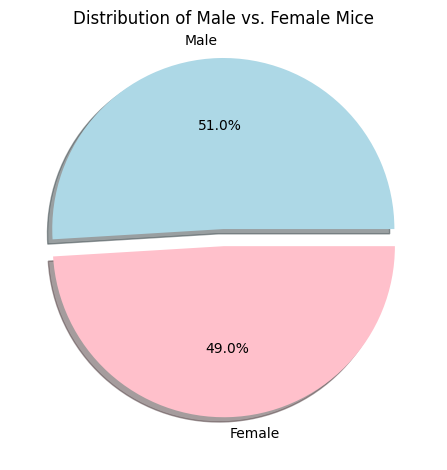

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    genderCounts.values,  # Values for the pie chart
    labels=genderCounts.index,  # Labels for the pie chart
    autopct="%1.1f%%",  # Display percentages
    colors=["lightblue", "pink"],  # Custom colors
    explode=[0.1, 0],  
    # Use shadow for a 3D effect
    shadow=True,
)

plt.title("Distribution of Male vs. Female Mice")
plt.tight_layout()  
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# Find the maximum timepoint for each mouse
# Get the last (greatest) timepoint for each mouse

lastTimepoint = cleanedDataResultsDF.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

lastTumorTimepointDF = pd.merge(lastTimepoint, cleanedDataResultsDF, on=["Mouse ID", "Timepoint"], how="left")
lastTumorTimepointDF.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolumes = {}

# Create the loop
for treatment in treatments:
    treatmentData = lastTumorTimepointDF[lastTumorTimepointDF["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumorVolumes[treatment] = treatmentData

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = treatmentData.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    median = quartiles[.5]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = treatmentData[(treatmentData <lower_bound) | (treatmentData > upper_bound)]
    if len(outliers) == 0:
        print(f"{treatment}'s potential outliers: None")
    else:
        output = f"{treatment}'s potential outliers: "
        for o in outliers:
            output += f"{o}"
        print(output)


Capomulin's potential outliers: None
Ramicane's potential outliers: None
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None


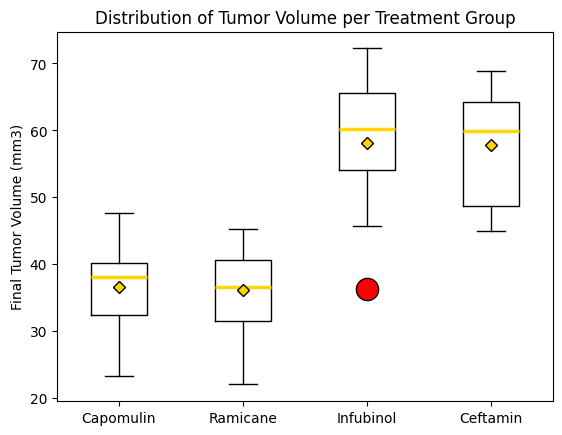

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volumes for each drug regimen
treatments =  ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create a list to store tumor volumes for each treatment
tumor_volumes_by_treatment = []
# Loop through each treatment and extract the corresponding tumor volumes
for treatment in treatments:
    tumor_volumes = lastTumorTimepointDF[lastTumorTimepointDF["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_volumes_by_treatment.append(tumor_volumes)

# create the boxplot
flierprops = dict(marker='o', markerfacecolor='red', markersize=16, markeredgecolor='black')

medianprops = dict(linestyle='-', linewidth=2.5, color='gold')

meanpointprops = dict(marker='D', markeredgecolor='black', markerfacecolor='gold')
plt.boxplot(
    tumor_volumes_by_treatment, tick_labels=treatments,
    flierprops=flierprops, medianprops=medianprops,
    meanprops=meanpointprops, showmeans=True)

plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume per Treatment Group')


 
plt.show()

## Line and Scatter Plots

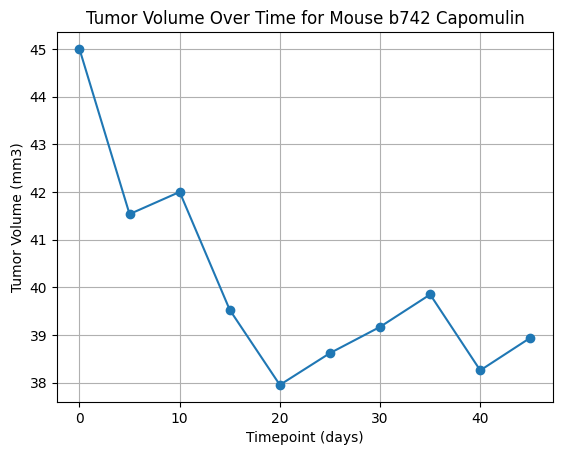

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulinDataDF = cleanedDataResultsDF[cleanedDataResultsDF["Drug Regimen"] == "Capomulin"]
b742Data = capomulinDataDF[capomulinDataDF["Mouse ID"] == "b742"]
plt.plot(b742Data["Timepoint"],
         b742Data["Tumor Volume (mm3)"],
         marker="o")
plt.title(f"Tumor Volume Over Time for Mouse b742 Capomulin")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

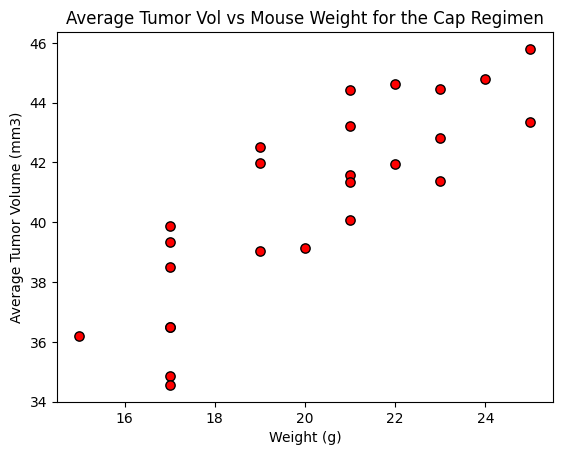

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Group by Mouse ID and calculate the mean for numeric columns
capomulinDataAve = capomulinDataDF.groupby("Mouse ID")[["Weight (g)", "Tumor Volume (mm3)"]].mean().reset_index()

# Create the scatter plot
capomulinDataAve
plt.scatter(
    capomulinDataAve["Weight (g)"],
    capomulinDataAve["Tumor Volume (mm3)"],
    facecolor="red",
    edgecolor="black",
    s=45
)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Vol vs Mouse Weight for the Cap Regimen")
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.
This indicates a very strong positive correlation.
y = 0.95x + 21.55


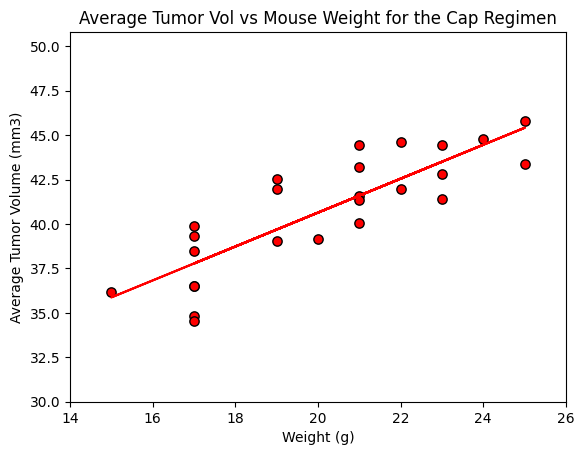

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# establish whether there is a strong correlation between weight and tumor volume
mouseWeight = capomulinDataAve["Weight (g)"]
tumorVol = capomulinDataAve["Tumor Volume (mm3)"]
correlation = st.pearsonr(mouseWeight, tumorVol)

# State where the correlation rates
correlationValue = round(correlation[0], 2)

print(f"The correlation between mouse weight and the average tumor volume is {correlationValue}.")
if 0.8 <= correlationValue <= 1.0:
    print("This indicates a very strong positive correlation.")
elif 0.6 <= correlationValue < 0.8:
    print("This indicates a strong positive correlation.")
elif 0.4 <= correlationValue < 0.6:
    print("This indicates a moderate positive correlation.")
elif 0.2 <= correlationValue < 0.4:
    print("This indicates a weak positive correlation.")
elif 0 <= correlationValue < 0.2:
    print("This indicates a very weak positive correlation.")
else:
    print("This indicates no correlation or a negative correlation.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouseWeight, tumorVol)
regress_values = mouseWeight * slope + intercept

lineEq = f"y = {slope:.2f}x + {intercept:.2f}"
print(lineEq)



capomulinDataAve
plt.scatter(
    capomulinDataAve["Weight (g)"],
    capomulinDataAve["Tumor Volume (mm3)"],
    facecolor="red",
    edgecolor="black",
    s=45
);

# plot the line of best fit
plt.plot(mouseWeight, regress_values, "r-")

# display the line of best fit equation
plt.annotate(lineEq, (30, 30), fontsize=10, color="blue")

# adjust the x-axis and y-axis spacing
plt.ylim(30, tumorVol.max() + 5)
plt.xlim(14, 26)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Vol vs Mouse Weight for the Cap Regimen")
plt.show()